Mean Absolute Error (MAE): 120934.14524173028
Mean Squared Error (MSE): 44427861074.55912
Root Mean Squared Error (RMSE): 210779.1760932733
R^2 Score: 0.7061196766928359


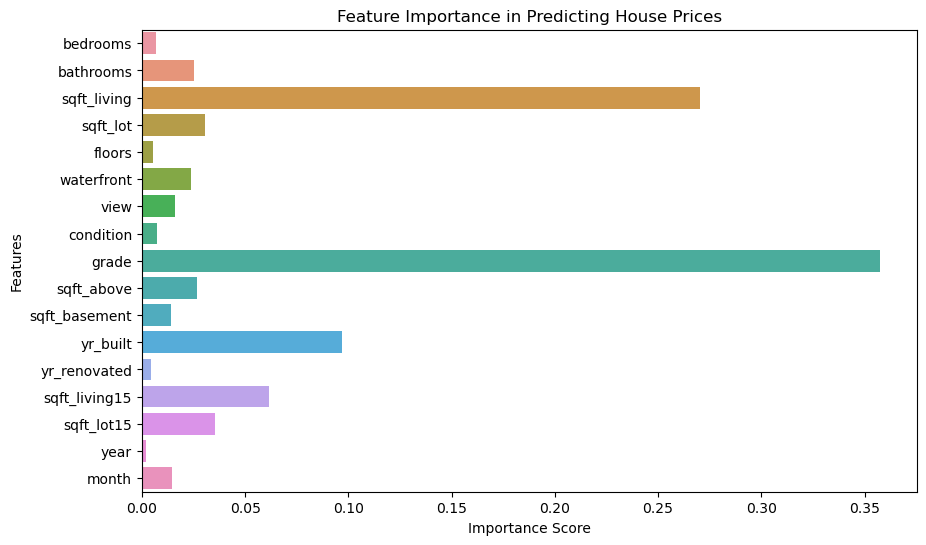

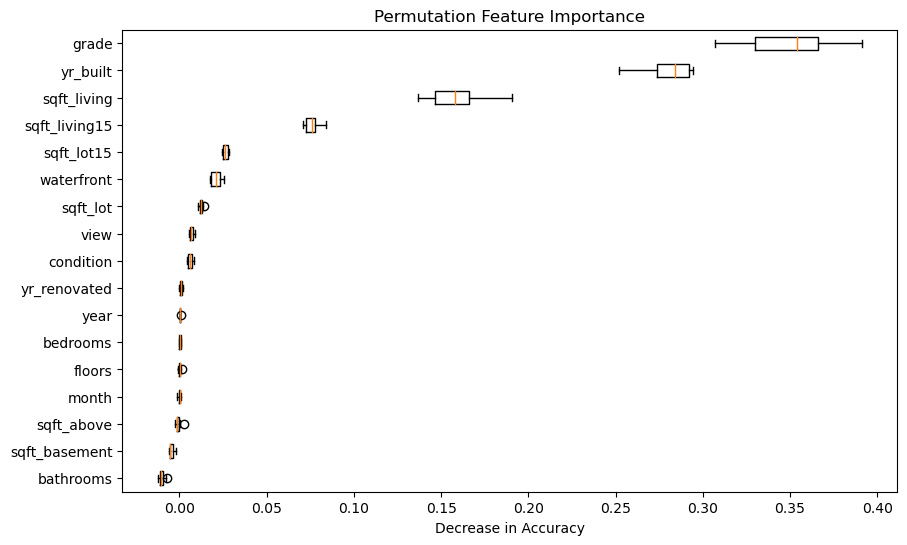

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = r"C:\Users\Rithanya.G\Documents\RITHANYA\DataMining\house_data.csv"
df = pd.read_csv(file_path)

# Handle missing values (if any)
df = df.dropna()

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Feature Engineering: Extract year and month from date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop columns that won't be used in modeling
df = df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'])

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The idea is to bring all the features into the same scale, so that one feature doesn’t dominate others due to its scale.Scale the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Random Forest Regressor model
# n_estimators=100: This specifies the number of decision trees in the forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
# trains the Random Forest model on the training data (X_train and y_train)
model.fit(X_train, y_train)

# an array of predicted values corresponding to each instance in the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# extracts the importance scores for each feature from the trained Random Forest model
feature_importances = model.feature_importances_
# retrieves the names of the features from the DataFrame X
feature_names = X.columns

# Plot feature importances
#the size of the figure
plt.figure(figsize=(10, 6))
# a horizontal bar plot of feature importances - The plot will show features on the y-axis and their corresponding importance scores on the x-axis
sns.barplot(x=feature_importances, y=feature_names)
# labels
plt.title('Feature Importance in Predicting House Prices')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Permutation Importance 
# it mixes up (or "shuffles") the values of one feature at a time and checks how much worse the model's predictions become
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title('Permutation Feature Importance')
plt.xlabel('Decrease in Accuracy')
plt.show()
